### Multi-omic Dataset: Latent representation using Autoencoders
- Load Data
- Normalize Data
- Define Autoencoder Model
- Train Autoencoder with normalized dataset
- Use transformed dataset for classification
- Use transformed dataset for clustering
- Evaluation and Conclusions

In [1]:
import Models
import numpy as np
import random as rn
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

# Load Data
X_renal_data = pd.read_csv('./x_exp_renal.csv', sep='\t') # Dataset has Donor ID as first column
y_renal_data = pd.read_csv('./y_renal.csv', sep=',') # Dataset has Donor ID on first column and Label on second column.

X_train_norm, X_train_swapped, X_test_norm, y_train, y_test, y_train_oh, y_test_oh = Models.prepare_datasets(X_renal_data.iloc[:,1:],y_renal_data["label"], test_size=0.2, swap_noise=0.15)

# We will use "X_train_norm" as training dataset for the Autoencoder

swapping: 65 rows.


In [2]:
import importlib
importlib.reload(Models)

<module 'Models' from 'C:\\Desarrollo\\Data Science\\Jupyter Notebooks\\Stage\\oss-stage-2019\\Singleomic Dataset\\Models.py'>

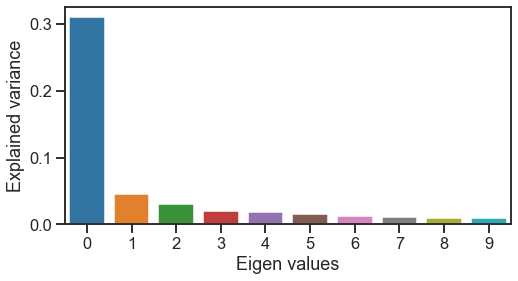

PCA on single-modal explained variance ratio: 0.48103795292302987


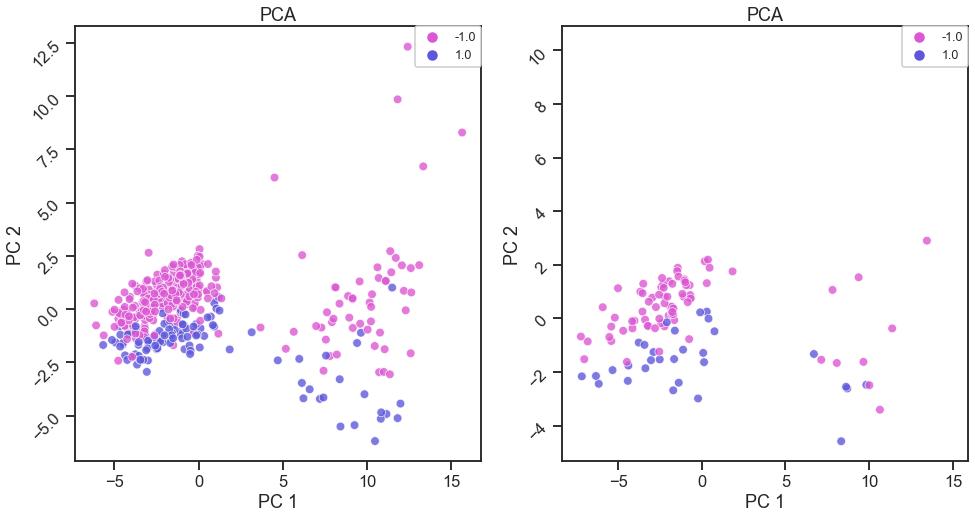

Compression: 102.52

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00024: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00029: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Epoch 00030: early stopping


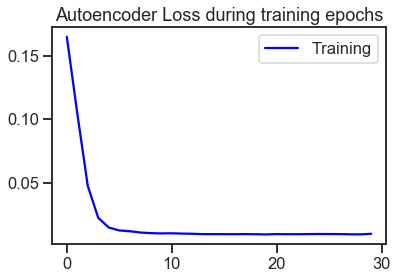

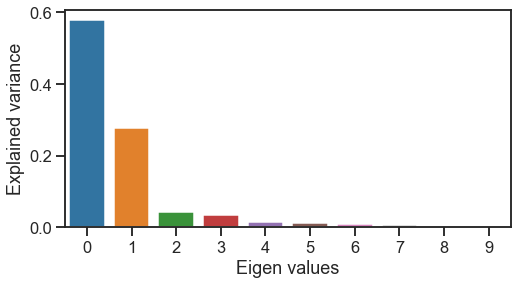

PCA on single-modal explained variance ratio: 0.9815157079550851


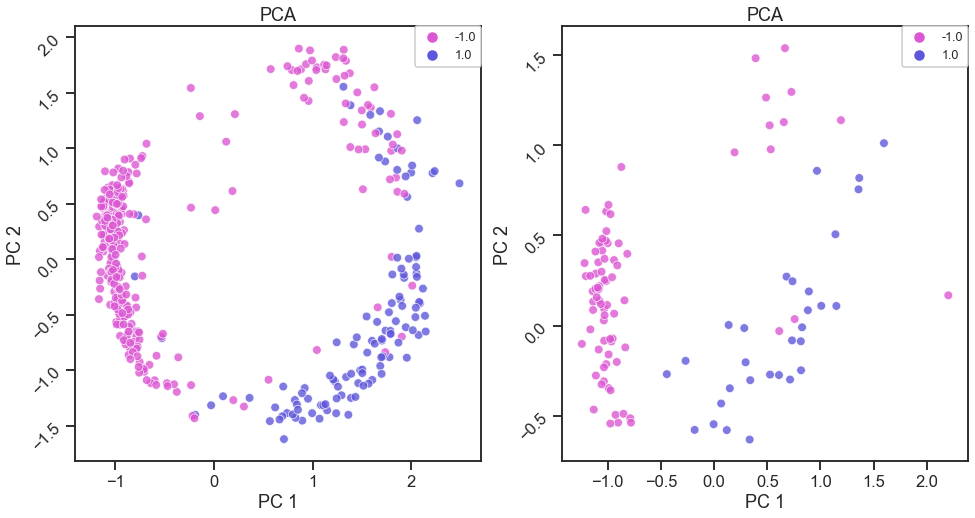

Results for AE: 

[[78  1]
 [29  1]]


              precision    recall  f1-score   support

          -1       0.73      0.99      0.84        79
           1       0.50      0.03      0.06        30

    accuracy                           0.72       109
   macro avg       0.61      0.51      0.45       109
weighted avg       0.67      0.72      0.63       109

Training set score for Logistic Regression: 0.949192
Testing  set score for Logistic Regression: 0.724771
[[79  0]
 [21  9]]


              precision    recall  f1-score   support

          -1       0.79      1.00      0.88        79
           1       1.00      0.30      0.46        30

    accuracy                           0.81       109
   macro avg       0.90      0.65      0.67       109
weighted avg       0.85      0.81      0.77       109

Training set score for SVM: 0.944573
Testing  set score for SVM: 0.807339
[[77  2]
 [ 5 25]]


              precision    recall  f1-score   support

          -1       0.94      0

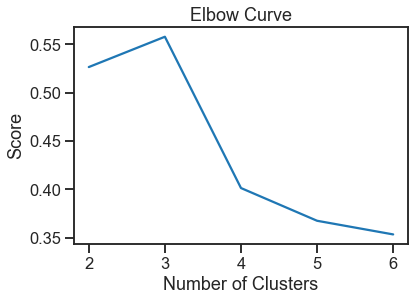

mutual information: 0.4240610137674801
AE 2 clusters -  silhoutte score: 0.5262152552604675
AE 3 clusters -  silhoutte score: 0.5561333894729614
AE 4 clusters -  silhoutte score: 0.5095471739768982
AE 5 clusters -  silhoutte score: 0.4682331085205078
AE 6 clusters -  silhoutte score: 0.45431390404701233


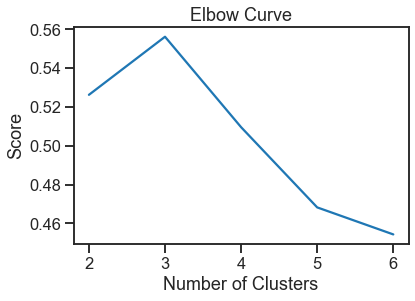

mutual information: 0.3990474158851148
AE 2 clusters -  silhoutte score: 0.5163233876228333
AE 3 clusters -  silhoutte score: 0.5457077622413635
AE 4 clusters -  silhoutte score: 0.3873002827167511
AE 5 clusters -  silhoutte score: 0.3468039631843567
AE 6 clusters -  silhoutte score: 0.3381214737892151


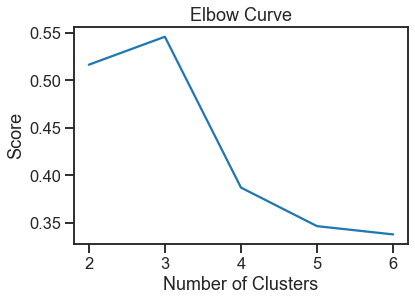

Compression: 102.52

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00020: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00030: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Epoch 00032: early stopping


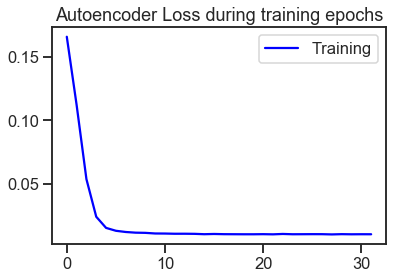

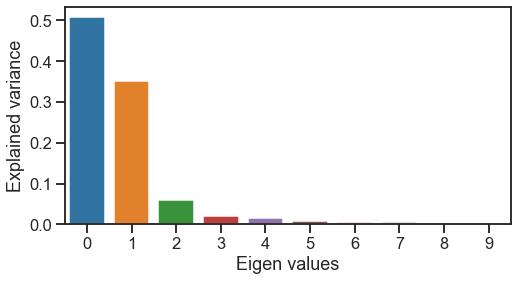

PCA on single-modal explained variance ratio: 0.979751411496327


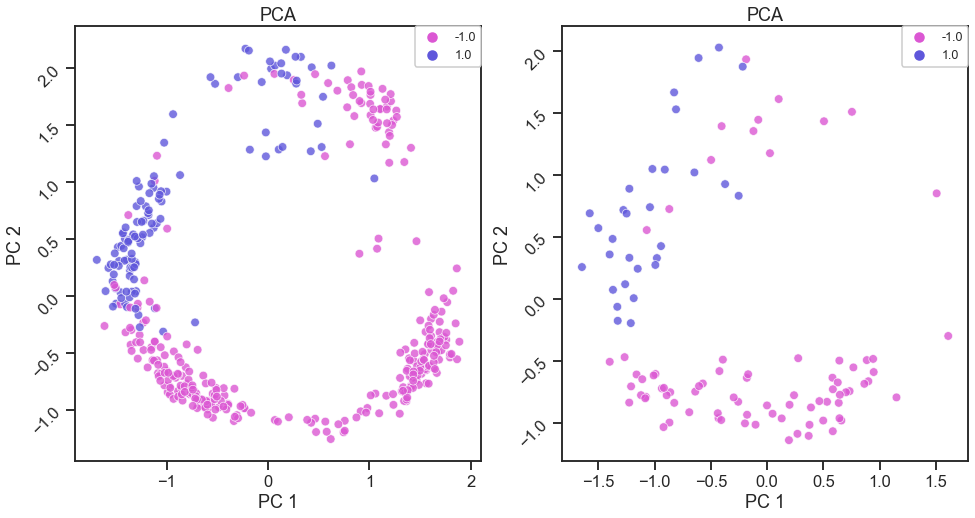

Results for AE: 

[[75  4]
 [ 2 28]]


              precision    recall  f1-score   support

          -1       0.97      0.95      0.96        79
           1       0.88      0.93      0.90        30

    accuracy                           0.94       109
   macro avg       0.92      0.94      0.93       109
weighted avg       0.95      0.94      0.95       109

Training set score for Logistic Regression: 0.942263
Testing  set score for Logistic Regression: 0.944954
[[74  5]
 [ 0 30]]


              precision    recall  f1-score   support

          -1       1.00      0.94      0.97        79
           1       0.86      1.00      0.92        30

    accuracy                           0.95       109
   macro avg       0.93      0.97      0.95       109
weighted avg       0.96      0.95      0.96       109

Training set score for SVM: 0.928406
Testing  set score for SVM: 0.954128
[[71  8]
 [ 0 30]]


              precision    recall  f1-score   support

          -1       1.00      0

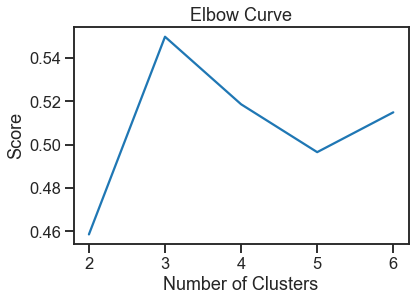

mutual information: 0.06455151938410629
AE 2 clusters -  silhoutte score: 0.4572649300098419
AE 3 clusters -  silhoutte score: 0.5424181222915649
AE 4 clusters -  silhoutte score: 0.512056291103363
AE 5 clusters -  silhoutte score: 0.5151033401489258
AE 6 clusters -  silhoutte score: 0.5124885439872742


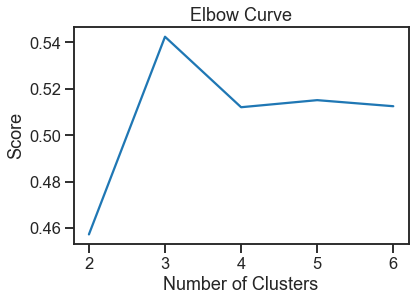

mutual information: 0.065362088901586
AE 2 clusters -  silhoutte score: 0.45504704117774963
AE 3 clusters -  silhoutte score: 0.5440680384635925
AE 4 clusters -  silhoutte score: 0.5077643394470215
AE 5 clusters -  silhoutte score: 0.5093974471092224
AE 6 clusters -  silhoutte score: 0.4956401586532593


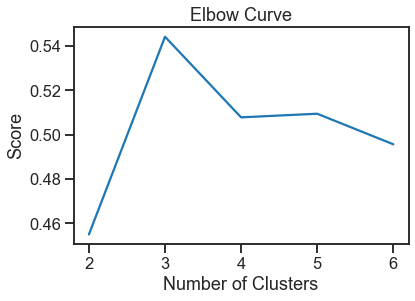

In [3]:
###  Hyperparamter tuning
# MAP y_train from classes -1 and 1 to 0 and 1
y_train_map = ((y_train + 1)/2).astype(int)

### VISUALIZATION WITH PCA
## ORIGINAL DATASET
X_latent_pca, X_latent_test_pca = Models.perform_PCA(X_train_norm, X_test_norm, y_train, y_test, n_components=10)

dropouts = [0.01]
l1s = [0]
l2s = [0.000005]
scores = []
for dropout in dropouts:
    for l1 in l1s:
        for l2 in l2s:
            ## Build and Train Autoencoder
            autoencoder, encoder, decoder, loss = Models.build_and_train_autoencoder(X_train_norm,
                                                                          X_train_norm,
                                                                          encoding_dim=50, 
                                                                          regularizer=tf.keras.regularizers.l1_l2(l1,l2),
                                                                          dropout=dropout,
                                                                          epochs=200)
            ## Encode datasets
            X_latent_ae = Models.encode_dataset(X_train_norm, encoder)
            X_latent_test_ae = Models.encode_dataset(X_test_norm, encoder)
         
            ## PCA ON AUTOENCODER LATENT SPACE
            X_latent_pca_ae, X_latent_test_pca_ae = Models.perform_PCA(X_latent_ae, X_latent_test_ae, y_train, y_test, n_components=10)

            ### CLASSIFICATION ###
            # We use the reduced dataset to train a classifier and compare it against the same classifier trained with the original dataset.
            lr_accuracy, svm_accuracy, rf_accuracy = Models.classify(X_latent_ae, X_latent_test_ae, y_train, y_test, model_type="AE")

            ### CLUSTERING ###
            silhouette_kmeans, mutual_info_kmeans, silhouette_spectral, mutual_info_spectral, silhouette_hierarchical, mutual_info_hierarchical = Models.cluster(X_latent_ae,y_train_map, model_type="AE")

            scores.append((dropout,l1,l2,loss,lr_accuracy,svm_accuracy,rf_accuracy,silhouette_kmeans, mutual_info_kmeans, silhouette_spectral, mutual_info_spectral, silhouette_hierarchical, mutual_info_hierarchical))


In [4]:
scores = pd.DataFrame(scores,
                      columns=["dropout","l1","l2","loss","LR_accuracy","SVM_accuracy", "RF_accuracy","kmeans_silhouette","kmeans_mutual_info","spectral_silhouette","spectral_mutual_info","hierarchical_silhouette","hierarchical_mutual_info"])    
scores

,dropout,l1,l2,loss,LR_accuracy,SVM_accuracy,RF_accuracy,kmeans_silhouette,kmeans_mutual_info,spectral_silhouette,spectral_mutual_info,hierarchical_silhouette,hierarchical_mutual_info
0,0.01,0,0.000000,0.009604,0.724771,0.807339,0.935780,0.526446,0.440406,0.526215,0.424061,0.516323,0.399047
1,0.01,0,0.000001,0.010007,0.944954,0.954128,0.926606,0.458564,0.064311,0.457265,0.064552,0.455047,0.065362


### RESULTS 

| Encoding dim  | l1      | l2      | Dropout  | Loss   | Accuracy (LR) | Accuracy (SVM) | Accuracy (RF) | Silohuette Score (K-means) | Mutual Information (K-means) |
|---------------|---------|---------|----------|--------|---------------|----------------|---------------|----------------------------|------------------------------|
| 50            | 0       | 0       | 0        | 0.009  |  0.95         | 0.96           | 0.91          | 0.55                       | 0.4260                       |
| 50            | 0       | 0       | 0.01     | 0.009  |  0.95         | 0.96           | 0.95          | 0.44                       | 0.3813                       |
| 50            | 0       | 0       | 0.05     | 0.0094 |  0.87         | 0.92           | 0.88          | 0.45                       | 0.3079                       |
| 50            | 0       | 0       | **0.1**      | 0.0094 |  0.96         | 0.98           | 0.96          | 0.59                       | 0.4695                       |
| 50            | 0       | 0       | 0.15     | 0.0097 |  0.95         | 0.77           | 0.92          | 0.51                       | 0.1563                       |
| 50            | 0       | 0       | 0.20     | 0.0097 |  0.95         | 0.92           | 0.92          | 0.48                       | 0.3555                       |
| 50            | 0       | 0       | 0.30     | 0.0096 |  0.96         | 0.97           | 0.95          | 0.41                       | 0.4501                       |
| 50            | 0       | 0       | 0.40     | 0.0097 |  0.96         | 0.91           | 0.96          | 0.46                       | 0.0020                       |
| 50            | 0       | 0       | 0.50     | 0.0100 |  0.95         | 0.95           | 0.97          | 0.49                       | 0.4412                       |
|---------------|---------|---------|----------|--------|---------------|----------------|---------------|----------------------------|------------------------------|
| 50            | **0**   | 0       | 0.10     | 0.0099 |  0.96         | 0.97           | 0.95          | 0.60                       | 0.4585                       |
| 50            | 0.000001| 0       | 0.10     | 0.0115 |  0.95         | 0.95           | 0.96          | 0.45                       | 0.4671                       |
| 50            | 0.00001 | 0       | 0.10     | 0.0147 |  0.95         | 0.97           | 0.95          | 0.52                       | 0.4738                       |
| 50            | 0.0001  | 0       | 0.10     | 0.0143 |  0.93         | 0.95           | 0.94          | 0.67                       | 0.0010                       |
| 50            | 0.001   | 0       | 0.10     | 0.0151 |  0.72         | 0.72           | 0.65          | 0.84                       | 0.0008                       |
|---------------|---------|---------|----------|--------|---------------|----------------|---------------|----------------------------|------------------------------|
| 50            | 0       | 0       | 0.10     | 0.0095 |  0.88         | 0.73           | 0.90          | 0.43                       | 0.1163                       |
| 50            | 0       | 0.000001| 0.10     | 0.0102 |  0.82         | 0.86           | 0.88          | 0.41                       | 0.4611                       |
| 50            | 0       | **0.000005**| 0.10     | 0.0111 |  0.95         | 0.97           | 0.96          | 0.59                       | 0.4271                       |
| 50            | 0       | 0.00001 | 0.10     | 0.0108 |  0.94         | 0.94           | 0.95          | 0.40                       | 0.3934                       |
| 50            | 0       | 0.00005 | 0.10     | 0.0132 |  0.86         | 0.90           | 0.88          | 0.52                       | 0.4355                       |
| 50            | 0       | 0.0001  | 0.10     | 0.0142 |  0.96         | 0.97           | 0.95          | 0.55                       | 0.4490                       |
| 50            | 0       | 0.001   | 0.10     | 0.0122 |  0.92         | 0.91           | 0.93          | 0.61                       | 0.2537                       |
| 50            | 0       | 0.01    | 0.10     | 0.0117 |  0.72         | 0.72           | 0.66          | 0.82                       | 0.0004                       |
| 50            | 0       | 0.1     | 0.10     | 0.0141 |  0.72         | 0.72           | 0.33          | 0.82                       | 0.0007                       |
|---------------|---------|---------|----------|--------|---------------|----------------|---------------|----------------------------|------------------------------|
| 100           | 0       | 0       | 0.05     | 0.0096 |  0.96         | 0.96           | 0.95          | 0.53                       | 0.4738                       |
| 100           | 0.000001| 0.000005| 0.05     | 0.0113 |  0.95         | 0.94           | 0.95          | 0.39                       | 0.4530                       |
| 100           | 0       | 0.000005| 0.10     | 0.0110 |  0.95         | 0.94           | 0.95          | 0.45                       | 0.4660                       |
| 100           | **0.000001**| **0.000001**| **0.10**| 0.0118 |  0.96         | 0.98           | 0.96          | 0.43                       | 0.4359                       |
| 100           | 0       | 0.000001| 0.15     | 0.0098 |  0.94         | 0.95           | 0.94          | 0.44                       | 0.4759                       |
| 100           | 0.000001| 0.000005| 0.15     | 0.0106 |  0.96         | 0.94           | 0.97          | 0.36                       | 0.4355                       |
|---------------|---------|---------|----------|--------|---------------|----------------|---------------|----------------------------|------------------------------|
| 200           | **0**       | **0.000001**| **0.05**     | 0.0100 |  0.96         | 0.97           | 0.96          | 0.45                       | 0.4530                       |
| 200           | 0.000001| 0       | 0.05     | 0.0106 |  0.96         | 0.96           | 0.96          | 0.38                       | 0.4573                       |
| 200           | 0.000001| 0.000005| 0.10     | 0.0119 |  0.95         | 0.95           | 0.98          | 0.42                       | 0.3997                       |
